In [184]:
%matplotlib inline
import pickle
import numpy as np
import pandas as pd
from __future__ import division
import statsmodels.api as sm
from sklearn.linear_model import ElasticNet
from patsy import dmatrices
import matplotlib.pyplot as plt
import matplotlib
import string
import re
matplotlib.style.use('ggplot')

> Import data

In [98]:
with open("movie_data.pkl", 'r') as picklefile: 
    df = pickle.load(picklefile)

> Add studio variable

In [99]:
df.rename(columns={'Sci-Fi': 'Sci_Fi'}, inplace=True)
df.head()

,duration,gross,metacritic,opening,rating,release,studio,title,month,Action,...,Horror,Music,Musical,Mystery,Romance,Sci_Fi,Sport,Thriller,War,Western
/title/tt0035423/,118,47095453,44,2562448.0,PG-13,2001-12-25,Konrad Pictures,Kate & Leopold,12,0,...,0,0,0,0,1,0,0,0,0,0
/title/tt0118589/,104,4273372,14,2414596.0,PG-13,2001-09-21,Twentieth Century Fox Film Corporation,Glitter,9,0,...,0,1,0,0,1,0,0,0,0,0
/title/tt0118694/,98,2734044,85,138340.5,PG,2001-03-09,Block 2 Pictures,In the Mood for Love,3,0,...,0,0,0,0,1,0,0,0,0,0
/title/tt0118926/,132,2377348,64,92433.0,R,2003-05-23,Fox Searchlight Pictures,The Dancer Upstairs,5,0,...,0,0,0,0,0,0,0,1,0,0
/title/tt0120202/,105,6920692,75,580163.0,R,2001-01-12,Filmtown Entertainment,State and Main,1,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
studio = df['studio'].str.get_dummies()
studio.head()

,"""DIA"" Productions GmbH & Co. KG",10th Hole Productions,120 Films,120dB Films,13th Night Productions,1492 Pictures,19 Entertainment,1984 Private Defense Contractors,2 Loop Films,2-Team Productions,...,Zeynofilm,Zik Zak Kvikmyndir,Zininsa Film Production,Zion Films,double A Films,erbp,i5 Films,iDeal Partners Film Fund,micro_scope,nWave Pictures
/title/tt0035423/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118589/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118694/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118926/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0120202/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
for name in studio.columns:
    name_as_list = name.split()
    new_list = []
    for word in name_as_list:
        word = re.sub("[^a-z0-9]", "", word.lower())
        new_list.append(word)
    new_name = 'X_' + '_'.join(new_list)
    studio.rename(columns={name: new_name}, inplace=True)

studio.head()

,X_dia_productions_gmbh__co_kg,X_10th_hole_productions,X_120_films,X_120db_films,X_13th_night_productions,X_1492_pictures,X_19_entertainment,X_1984_private_defense_contractors,X_2_loop_films,X_2team_productions,...,X_zeynofilm,X_zik_zak_kvikmyndir,X_zininsa_film_production,X_zion_films,X_double_a_films,X_erbp,X_i5_films,X_ideal_partners_film_fund,X_microscope,X_nwave_pictures
/title/tt0035423/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118589/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118694/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118926/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0120202/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
df_studio = df.join(studio)

In [103]:
df_studio.head()

,duration,gross,metacritic,opening,rating,release,studio,title,month,Action,...,X_zeynofilm,X_zik_zak_kvikmyndir,X_zininsa_film_production,X_zion_films,X_double_a_films,X_erbp,X_i5_films,X_ideal_partners_film_fund,X_microscope,X_nwave_pictures
/title/tt0035423/,118,47095453,44,2562448.0,PG-13,2001-12-25,Konrad Pictures,Kate & Leopold,12,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118589/,104,4273372,14,2414596.0,PG-13,2001-09-21,Twentieth Century Fox Film Corporation,Glitter,9,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118694/,98,2734044,85,138340.5,PG,2001-03-09,Block 2 Pictures,In the Mood for Love,3,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0118926/,132,2377348,64,92433.0,R,2003-05-23,Fox Searchlight Pictures,The Dancer Upstairs,5,0,...,0,0,0,0,0,0,0,0,0,0
/title/tt0120202/,105,6920692,75,580163.0,R,2001-01-12,Filmtown Entertainment,State and Main,1,0,...,0,0,0,0,0,0,0,0,0,0


> Re-index by title

In [104]:
df_studio = df_studio.set_index('title')

In [105]:
df_studio.head()

,duration,gross,metacritic,opening,rating,release,studio,month,Action,Adventure,...,X_zeynofilm,X_zik_zak_kvikmyndir,X_zininsa_film_production,X_zion_films,X_double_a_films,X_erbp,X_i5_films,X_ideal_partners_film_fund,X_microscope,X_nwave_pictures
title,,,,,,,,,,,,,,,,,,,,,
Kate & Leopold,118,47095453,44,2562448.0,PG-13,2001-12-25,Konrad Pictures,12,0,0,...,0,0,0,0,0,0,0,0,0,0
Glitter,104,4273372,14,2414596.0,PG-13,2001-09-21,Twentieth Century Fox Film Corporation,9,0,0,...,0,0,0,0,0,0,0,0,0,0
In the Mood for Love,98,2734044,85,138340.5,PG,2001-03-09,Block 2 Pictures,3,0,0,...,0,0,0,0,0,0,0,0,0,0
The Dancer Upstairs,132,2377348,64,92433.0,R,2003-05-23,Fox Searchlight Pictures,5,0,0,...,0,0,0,0,0,0,0,0,0,0
State and Main,105,6920692,75,580163.0,R,2001-01-12,Filmtown Entertainment,1,0,0,...,0,0,0,0,0,0,0,0,0,0


> Test and train split

In [106]:
test = df_studio[df_studio['release'] >= '2011-01-01 00:00:00']
train = df_studio[df_studio['release'] < '2011-01-01 00:00:00']

print len(train), len(test)
print len(test) / (len(train) + len(test))

2919 1119
0.277117384844


## Investigate numerical variables

Month

In [107]:
monthly = train.groupby(['month'])['metacritic'].mean()

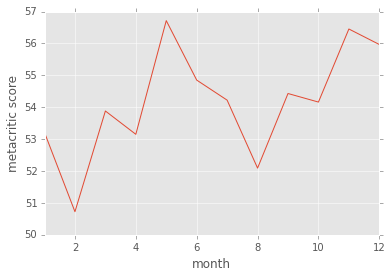

In [108]:
monthly.plot(x='month', y='metacritic')
plt.ylabel('metacritic score')

> Reset y-axis to start at 0

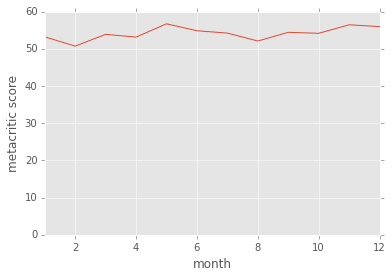

In [109]:
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0,60))

monthly.plot(x='month', y='metacritic')
plt.ylabel('metacritic score')

In [110]:
monthly

month
1     53.206478
2     50.723810
3     53.882812
4     53.151394
5     56.716814
6     54.852217
7     54.222826
8     52.091603
9     54.430921
10    54.162791
11    56.454545
12    55.968468
Name: metacritic, dtype: float64

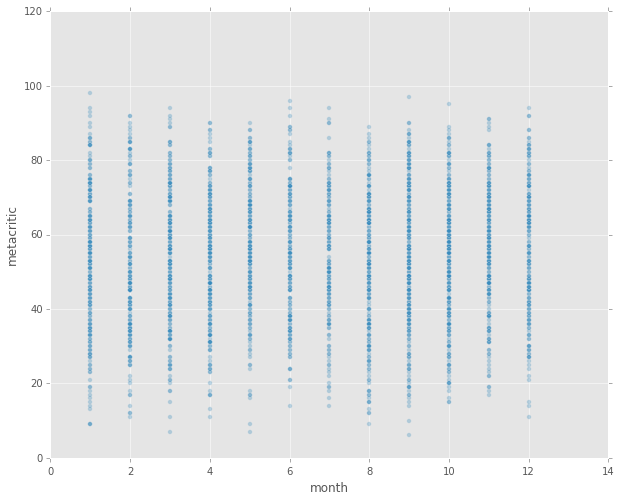

In [111]:
train.plot(kind='scatter', x='month', y='metacritic', alpha=0.3, figsize = (10,8))

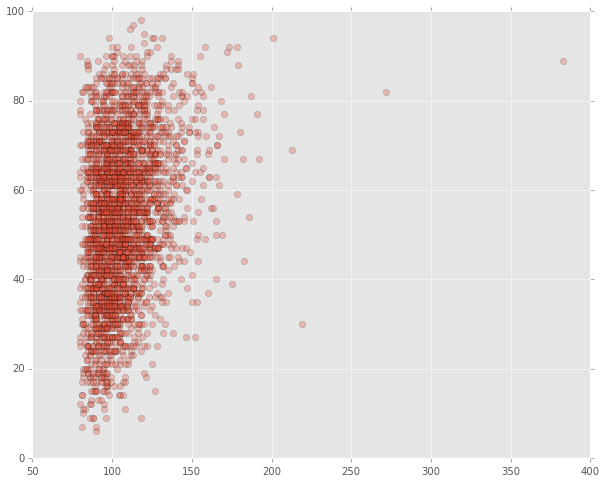

In [128]:
plt.figure(figsize = (10,8))
duration = train['duration']
y = train['metacritic']

plt.plot(duration, y, 'o', alpha=0.3)

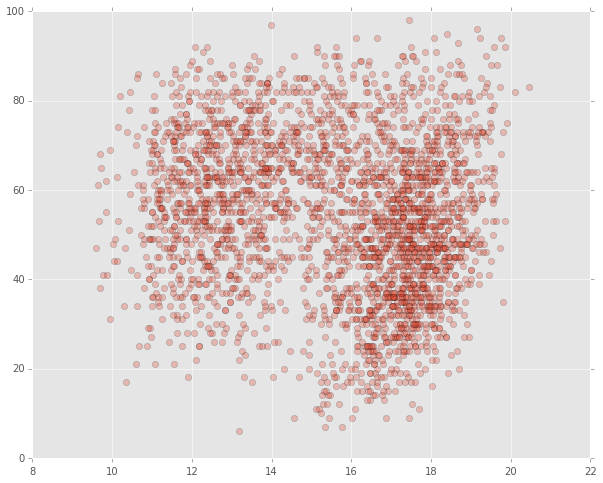

In [135]:
plt.figure(figsize = (10,8))
gross = train['gross']

plt.plot(np.log(gross), y, 'o', alpha=0.3)

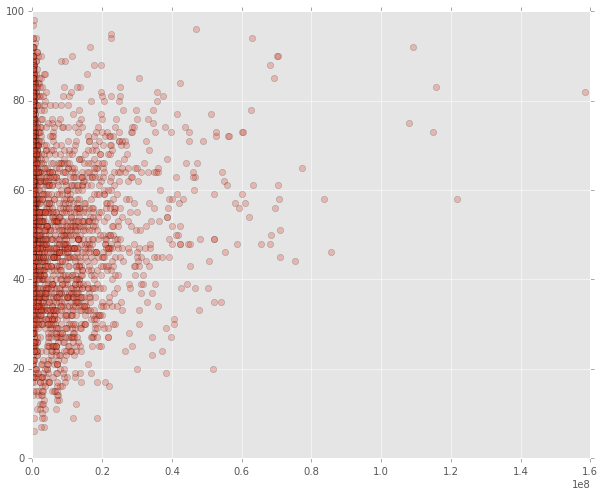

In [137]:
plt.figure(figsize = (10,8))
opening = train['opening']

plt.plot(opening, y, 'o', alpha=0.3)

## Investigate and transform categorical variables
Production studios

In [162]:
groupby_studios = train.groupby(['studio'])

studios_freq = groupby_studios.filter(lambda x: len(x) > 4)
top_studios = studios_freq.groupby(['studio']).size().order(ascending=False)[:20]

pro_studios = top_studios.index


def transform_names(series):
    """
    Transforms the studio names to new column names.
    Returns strings of studio names separated by '+' 
    for use in regression function.
    """
    series_new = []
    for name in series:
        name_as_list = name.split()
        new_list = []
        for word in name_as_list:
            word = re.sub("[^a-z0-9]", "", word.lower())
            new_list.append(word)
        new_name = 'X_' + '_'.join(new_list)
        series_new.append(new_name)
        series_str = ' + '.join(series_new)
    return str(series_str)


pro_studios_str = transform_names(pro_studios)

pro_studios_str

'X_universal_pictures + X_warner_bros + X_paramount_pictures + X_twentieth_century_fox_film_corporation + X_new_line_cinema + X_columbia_pictures_corporation + X_touchstone_pictures + X_dreamworks_skg + X_walt_disney_pictures + X_columbia_pictures + X_metrogoldwynmayer_mgm + X_miramax + X_fox_searchlight_pictures + X_dimension_films + X_revolution_studios + X_screen_gems + X_fox_2000_pictures + X_lionsgate + X_focus_features + X_lions_gate_films'

In [61]:
train.sort(['metacritic'], ascending=False)[:10]

,duration,gross,metacritic,opening,rating,release,studio,month,Action,Adventure,...,X_zeynofilm,X_zik_zak_kvikmyndir,X_zininsa_film_production,X_zion_films,X_double_a_films,X_erbp,X_i5_films,X_ideal_partners_film_fund,X_microscope,X_nwave_pictures
title,,,,,,,,,,,,,,,,,,,,,
Pan's Labyrinth,118,37623143,98,501691.0,R,2007-01-19,Estudios Picasso,1,0,0,...,0,0,0,0,0,0,0,0,0,0
"4 Months, 3 Weeks and 2 Days",113,1185783,97,51712.0,UNRATED,2007-09-14,Mobra Films,9,0,0,...,0,0,0,0,0,0,0,0,0,0
Ratatouille,111,206445654,96,47027395.0,G,2007-06-29,Pixar Animation Studios,6,0,0,...,0,0,0,0,0,0,0,0,0,0
The Social Network,120,96917897,95,22445653.0,PG-13,2010-10-01,Columbia Pictures,10,0,0,...,0,0,0,0,0,0,0,0,0,0
Sideways,126,71502303,94,207042.0,R,2005-01-21,Fox Searchlight Pictures,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Spirited Away,125,10049886,94,1052197.0,PG,2003-03-28,Tokuma Shoten,3,0,1,...,0,0,0,0,0,0,0,0,0,0
The Hurt Locker,131,17017811,94,145352.0,R,2009-07-31,Voltage Pictures,7,0,0,...,0,0,0,0,0,0,0,0,0,0
WALL·E,98,223808164,94,63087526.0,G,2008-06-27,Walt Disney Pictures,6,0,1,...,0,0,0,0,0,0,0,0,0,0
The Lord of the Rings: The Return of the King,201,377845905,94,22532641.5,PG-13,2003-12-17,New Line Cinema,12,0,1,...,0,0,0,0,0,0,0,0,0,0


In [70]:
studio_meta = train.groupby(['studio'])['metacritic'].mean()
studio_meta.sort(ascending=False)
studio_meta.index[:20]

Index([                          u'Mobra Films',
                     u'Pixar Animation Studios',
                            u'Voltage Pictures',
                               u'Tokuma Shoten',
        u'Asia Union Film & Entertainment Ltd.',
                          u'Soudaine Compagnie',
                                   u'AtomFilms',
                             u'Filmi Doomireew',
       u'Aboriginal Peoples Television Network',
                                u'2.4.7. Films',
             u'Wiedemann & Berg Filmproduktion',
                           u'Gigantic Pictures',
                                   u'BiBi Film',
                                 u'Four by Two',
                    u'Bórd Scannán na hÉireann',
                                 u'Pallas Film',
                         u'Anhelo Producciones',
                                    u'Dreamlab',
                          u'Aardman Animations',
               u'Hungarian Motion Picture Ltd.'],
      dtype='object

In [20]:
train[train['studio'] == 'Aboriginal Peoples Television Network']

,duration,gross,metacritic,opening,rating,release,studio,month,Action,Adventure,...,Zeynofilm,Zik Zak Kvikmyndir,Zininsa Film Production,Zion Films,double A Films,erbp,i5 Films,iDeal Partners Film Fund,micro_scope,nWave Pictures
title,,,,,,,,,,,,,,,,,,,,,
Atanarjuat: The Fast Runner,172,3786801,91,36342,R,2002-07-26,Aboriginal Peoples Television Network,7,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
studios_freq.groupby(['studio'])['metacritic'].mean().order(ascending=False)[:20]

studio
Why Not Productions                       82.800000
Beijing New Picture Film Co.              74.600000
Bandai Visual Company                     74.166667
HBO Films                                 73.500000
Haut et Court                             72.400000
CJ Entertainment                          71.333333
Alicéléo                                  71.000000
Arte France Cinéma                        70.200000
Fidélité Productions                      68.857143
Warner Independent Pictures (WIP)         68.571429
Fandango                                  68.200000
Focus Features                            68.000000
Canal+ España                             67.285714
Sony Pictures Classics                    67.000000
X-Filme Creative Pool                     65.800000
BBC Films                                 65.214286
British Broadcasting Corporation (BBC)    65.125000
Paramount Vantage                         64.250000
DreamWorks Animation                      64.066667
Fox S

In [22]:
train[train['studio'] == 'HBO Films']

,duration,gross,metacritic,opening,rating,release,studio,month,Action,Adventure,...,Zeynofilm,Zik Zak Kvikmyndir,Zininsa Film Production,Zion Films,double A Films,erbp,i5 Films,iDeal Partners Film Fund,micro_scope,nWave Pictures
title,,,,,,,,,,,,,,,,,,,,,
Real Women Have Curves,90,5844929,71,183772,PG-13,2002-11-08,HBO Films,11,0,0,...,0,0,0,0,0,0,0,0,0,0
Elephant,81,1227000,70,1229210,R,2003-11-14,HBO Films,11,0,0,...,0,0,0,0,0,0,0,0,0,0
Maria Full of Grace,101,6517198,87,139066,R,2004-08-06,HBO Films,8,0,0,...,0,0,0,0,0,0,0,0,0,0
Last Days,97,454711,67,306933,R,2005-05-13,HBO Films,5,0,0,...,0,0,0,0,0,0,0,0,0,0
The Notorious Bettie Page,91,1410778,64,143131,R,2006-05-05,HBO Films,5,0,0,...,0,0,0,0,0,0,0,0,0,0
Sugar,114,1081922,82,60140,R,2009-04-24,HBO Films,4,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
# create string of studios w/ highest mean meta scores from training set 
# for input in regression model

highmeta = studios_freq.groupby(['studio'])['metacritic'].mean().order(ascending=False)

highmeta_studios = highmeta[:20].index

highmeta_studios_str = transform_names(highmeta_studios)

highmeta_studios_str

'X_why_not_productions + X_beijing_new_picture_film_co + X_bandai_visual_company + X_hbo_films + X_cj_entertainment + X_aliclo + X_arte_france_cinma + X_fidlit_productions + X_warner_independent_pictures_wip + X_focus_features + X_fandango + X_canal_espaa + X_sony_pictures_classics + X_xfilme_creative_pool + X_bbc_films + X_paramount_vantage + X_dreamworks_animation + X_fox_searchlight_pictures + X_canal + X_british_broadcasting_corporation_bbc'

In [87]:
# create string of genres for input in regression model

genre_names = train.iloc[:,8:28].columns

genres_str = ' + '.join(genre_names)

genres_str

'Action + Adventure + Animation + Biography + Comedy + Crime + Drama + Family + Fantasy + History + Horror + Music + Musical + Mystery + Romance + Sci_Fi + Sport + Thriller + War + Western'

> Build first model using duration, gross, opening, rating, and month

In [138]:
# basic feature variables for regression model

basic = 'duration + gross + opening + rating + month'

In [139]:
y, X = dmatrices('metacritic ~ ' + basic, 
                 data=train, return_type='dataframe')

In [140]:
model1 = sm.OLS(y, X)
results1 = model1.fit()

results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             metacritic   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     64.73
Date:                Wed, 15 Jul 2015   Prob (F-statistic):          9.49e-109
Time:                        20:03:47   Log-Likelihood:                -12253.
No. Observations:                2919   AIC:                         2.453e+04
Df Residuals:                    2909   BIC:                         2.459e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            33.6565      2.960     11.372      0.000        27.853    39.460
rating[T.NC-17]       1.1795      5.908      0.200      0.842       -10.405    12.763
rating[T.PG]         -9.0142      2.538     -3.552      0.000       -13.991    -4.038
rating[T.PG-13]     -11.3204      2.458     -4.606      0.000       -16.140    -6.501
rating[T.R]          -3.9247      2.470     -1.589      0.112        -8.768     0.919
rating[T.UNRATED]     6.5152      2.669      2.441      0.015         1.282    11.748
duration              0.2369      0.017     13.613      0.000         0.203     0.271
gross                5.1e-08   7.89e-09      6.462      0.000      3.55e-08  6.65e-08
opening           -1.604e-07   3.52e-08     -4.562      0.000     -2.29e-07 -9.15e-08
month                 0.1074      0.087      1.241      0.215        -0.062     0.277
==============================================================================
Omnibus:                       39.788   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.646
Skew:                          -0.081   Prob(JB):                     2.70e-06
Kurtosis:                       2.570   Cond. No.                     1.53e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [141]:
y_test, X_test = dmatrices('metacritic ~ ' + basic, 
                           data=test, return_type='dataframe')

predict1 = results1.predict(X_test)

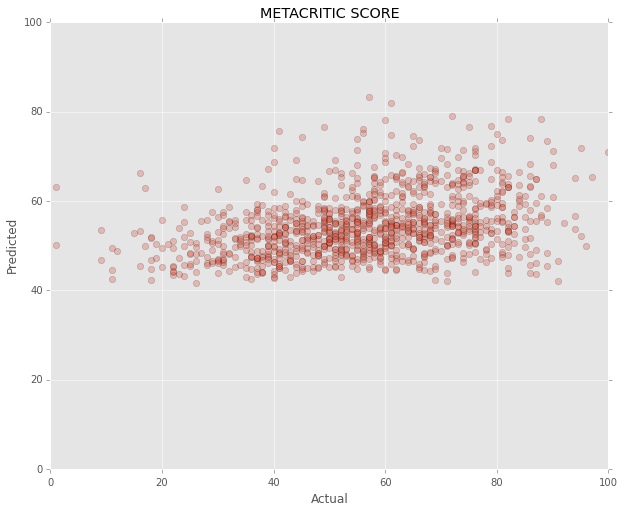

In [142]:
plt.figure(figsize = (10,8))
x1,x2,y1,y2 = plt.axis()
plt.axis((0,100,0,100))

plt.plot(y_test, predict1, 'o', alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('METACRITIC SCORE')

> Add genre columns and build another model

In [154]:
y2, X2 = dmatrices('metacritic ~ ' + basic + ' + ' + genres_str, 
                 data=train, return_type='dataframe')

In [155]:
model2 = sm.OLS(y2, X2)
results2 = model2.fit()

results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             metacritic   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     41.16
Date:                Wed, 15 Jul 2015   Prob (F-statistic):          1.54e-192
Time:                        20:11:11   Log-Likelihood:                -12015.
No. Observations:                2919   AIC:                         2.409e+04
Df Residuals:                    2889   BIC:                         2.427e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            34.7131      3.345     10.377      0.000        28.154    41.272
rating[T.NC-17]       6.0626      5.636      1.076      0.282        -4.989    17.114
rating[T.PG]         -4.3594      2.437     -1.789      0.074        -9.138     0.419
rating[T.PG-13]      -3.9420      2.621     -1.504      0.133        -9.081     1.197
rating[T.R]           2.8079      2.640      1.064      0.288        -2.368     7.983
rating[T.UNRATED]    10.3977      2.776      3.746      0.000         4.955    15.841
duration              0.1511      0.018      8.437      0.000         0.116     0.186
gross              7.355e-08    7.7e-09      9.545      0.000      5.84e-08  8.87e-08
opening           -1.176e-07   3.32e-08     -3.545      0.000     -1.83e-07 -5.26e-08
month                 0.0611      0.080      0.761      0.447        -0.096     0.219
Action               -6.0185      0.918     -6.554      0.000        -7.819    -4.218
Adventure            -0.3750      1.030     -0.364      0.716        -2.395     1.645
Animation            12.0402      1.742      6.911      0.000         8.624    15.456
Biography             2.5060      1.273      1.968      0.049         0.010     5.003
Comedy               -2.8467      0.766     -3.715      0.000        -4.349    -1.344
Crime                -2.0250      0.833     -2.432      0.015        -3.658    -0.392
Drama                 8.2735      0.789     10.491      0.000         6.727     9.820
Family               -0.4724      1.488     -0.317      0.751        -3.390     2.445
Fantasy              -2.5782      1.234     -2.089      0.037        -4.998    -0.159
History               1.1501      1.774      0.648      0.517        -2.328     4.628
Horror               -8.5863      1.256     -6.835      0.000       -11.050    -6.123
Music                -1.4881      1.436     -1.036      0.300        -4.304     1.328
Musical              -2.4433      2.330     -1.048      0.295        -7.013     2.126
Mystery              -1.9194      1.073     -1.788      0.074        -4.024     0.185
Romance              -2.5489      0.753     -3.385      0.001        -4.025    -1.072
Sci_Fi               -1.3395      1.375     -0.974      0.330        -4.036     1.357
Sport                -2.4624      1.653     -1.490      0.136        -5.704     0.779
Thriller             -1.5138      0.939     -1.612      0.107        -3.355     0.327
War                   1.8519      1.895      0.977      0.328        -1.863     5.567
Western               0.0323      4.180      0.008      0.994        -8.164     8.229
==============================================================================
Omnibus:                       19.047   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.402
Skew:   

In [156]:
y_test, X_test = dmatrices('metacritic ~ ' + basic + ' + ' + genres_str, 
                           data=test, return_type='dataframe')

predict2 = results2.predict(X_test)

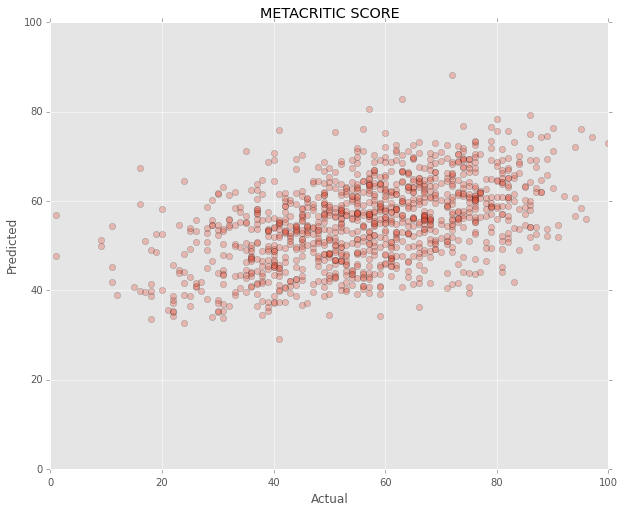

In [157]:
plt.figure(figsize = (10,8))
x1,x2,y1,y2 = plt.axis()
plt.axis((0,100,0,100))

plt.plot(y_test, predict2, 'o', alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('METACRITIC SCORE')

In [166]:
formula = 'metacritic ~ ' + basic + '+' + genres_str + '+' + highmeta_studios_str

In [167]:
y3, X3 = dmatrices(formula, data=train, return_type='dataframe')

model3 = sm.OLS(y3, X3)
results3 = model3.fit()

results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             metacritic   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     26.52
Date:                Wed, 15 Jul 2015   Prob (F-statistic):          3.48e-194
Time:                        20:20:54   Log-Likelihood:                -11974.
No. Observations:                2919   AIC:                         2.405e+04
Df Residuals:                    2869   BIC:                         2.435e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Intercept                                 34.4589      3.327     10.357      0.000        27.935    40.983
rating[T.NC-17]                            4.8822      5.618      0.869      0.385        -6.134    15.898
rating[T.PG]                              -4.9604      2.421     -2.049      0.041        -9.707    -0.214
rating[T.PG-13]                           -4.5755      2.603     -1.758      0.079        -9.679     0.528
rating[T.R]                                1.8438      2.621      0.703      0.482        -3.296     6.984
rating[T.UNRATED]                          9.3735      2.766      3.389      0.001         3.950    14.797
duration                                   0.1543      0.018      8.624      0.000         0.119     0.189
gross                                   7.291e-08   7.64e-09      9.541      0.000      5.79e-08  8.79e-08
opening                                -1.091e-07    3.3e-08     -3.303      0.001     -1.74e-07 -4.43e-08
month                                      0.0794      0.080      0.996      0.320        -0.077     0.236
Action                                    -5.7982      0.910     -6.371      0.000        -7.583    -4.014
Adventure                                 -0.2709      1.021     -0.265      0.791        -2.273     1.731
Animation                                 10.5836      1.827      5.792      0.000         7.000    14.167
Biography                                  2.1648      1.269      1.705      0.088        -0.324     4.654
Comedy                                    -2.8111      0.761     -3.692      0.000        -4.304    -1.318
Crime                                     -1.8900      0.828     -2.282      0.023        -3.514    -0.266
Drama                                      7.9120      0.783     10.110      0.000         6.378     9.446
Family                                    -0.0693      1.479     -0.047      0.963        -2.969     2.831
Fantasy                                   -2.4347      1.222     -1.992      0.046        -4.831    -0.038
History                                    0.9018      1.770      0.510      0.610        -2.568     4.372
Horror                                    -7.9927      1.247     -6.411      0.000       -10.437    -5.548
Music                                     -1.2640      1.425     -0.887      0.375        -4.057     1.529
Musical                                   -2.0530      2.312     -0.888      0.375        -6.585     2.479
Mystery                                   -2.0474      1.066     -1.920      0.055        -4.138     0.043
Romance                                   -2.5058      0.749     -3.346      0.001        -3.974    -1.037
Sci_Fi                                    -1.3073      1.363     -0.959      0.338     

In [168]:
y_test, X_test = dmatrices(formula, data=test, return_type='dataframe')

predict3 = results3.predict(X_test)

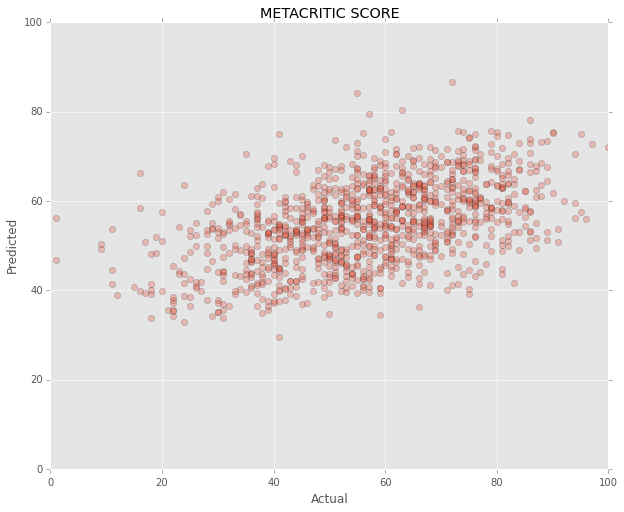

In [169]:
plt.figure(figsize = (10,8))
x1,x2,y1,y2 = plt.axis()
plt.axis((0,100,0,100))

plt.plot(y_test, predict3, 'o', alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('METACRITIC SCORE')

In [170]:
formula = ('metacritic ~ ' + basic + '+' + genres_str + '+' + highmeta_studios_str +
           '+' + pro_studios_str)

In [171]:
y4, X4 = dmatrices(formula, data=train, return_type='dataframe')

In [172]:
model4 = sm.OLS(y4, X4)
results4 = model4.fit()

results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             metacritic   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     20.71
Date:                Wed, 15 Jul 2015   Prob (F-statistic):          1.94e-195
Time:                        20:24:35   Log-Likelihood:                -11941.
No. Observations:                2919   AIC:                         2.402e+04
Df Residuals:                    2851   BIC:                         2.442e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------------
Intercept                                   34.4134      3.365     10.228      0.000        27.816    41.011
rating[T.NC-17]                              4.8431      5.604      0.864      0.388        -6.146    15.832
rating[T.PG]                                -3.9324      2.458     -1.600      0.110        -8.752     0.887
rating[T.PG-13]                             -3.4614      2.676     -1.294      0.196        -8.708     1.786
rating[T.R]                                  2.3104      2.676      0.863      0.388        -2.936     7.557
rating[T.UNRATED]                            9.4677      2.811      3.369      0.001         3.957    14.979
duration                                     0.1542      0.018      8.626      0.000         0.119     0.189
gross                                     7.553e-08   7.78e-09      9.711      0.000      6.03e-08  9.08e-08
opening                                  -9.041e-08   3.37e-08     -2.682      0.007     -1.57e-07 -2.43e-08
month                                        0.0883      0.079      1.113      0.266        -0.067     0.244
Action                                      -5.7376      0.907     -6.328      0.000        -7.515    -3.960
Adventure                                   -0.1314      1.023     -0.128      0.898        -2.138     1.875
Animation                                    9.8453      1.823      5.400      0.000         6.270    13.420
Biography                                    2.0442      1.263      1.619      0.106        -0.432     4.520
Comedy                                      -2.6795      0.759     -3.533      0.000        -4.167    -1.192
Crime                                       -1.5024      0.825     -1.821      0.069        -3.120     0.115
Drama                                        7.6940      0.783      9.825      0.000         6.158     9.229
Family                                       0.2821      1.484      0.190      0.849        -2.628     3.193
Fantasy                                     -2.2177      1.219     -1.820      0.069        -4.607     0.172
History                                      0.8082      1.757      0.460      0.646        -2.638     4.254
Horror                                      -7.3831      1.252     -5.899      0.000        -9.837    -4.929
Music                                       -1.3443      1.418     -0.948      0.343        -4.124     1.435
Musical                                     -2.2072      2.294     -0.962      0.336        -6.706     2.292
Mystery                                     -2.3245      1.063     -2.186      0.029        -4.410    -0.239
Romance                                     -2.4886      0.747     -3.333      0.001        -3.953    -1.025
Sci_Fi                         

In [179]:
basic2 = 'np.log(duration) + np.log(gross) + np.log(opening) + rating + month'

formula = ('metacritic ~ ' + basic2 + '+' + genres_str + '+' + highmeta_studios_str +
           '+' + pro_studios_str)

In [180]:
y4, X4 = dmatrices(formula, data=train, return_type='dataframe')

model4 = sm.OLS(y4, X4)
results4 = model4.fit()

results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             metacritic   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     23.44
Date:                Wed, 15 Jul 2015   Prob (F-statistic):          1.71e-220
Time:                        20:35:00   Log-Likelihood:                -11879.
No. Observations:                2919   AIC:                         2.389e+04
Df Residuals:                    2851   BIC:                         2.430e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------------
Intercept                                  -62.6557      9.776     -6.409      0.000       -81.823   -43.488
rating[T.NC-17]                              2.7659      5.491      0.504      0.615        -8.001    13.533
rating[T.PG]                                -3.6561      2.408     -1.519      0.129        -8.377     1.065
rating[T.PG-13]                             -2.7202      2.618     -1.039      0.299        -7.854     2.414
rating[T.R]                                  1.8312      2.627      0.697      0.486        -3.319     6.981
rating[T.UNRATED]                            9.3443      2.801      3.336      0.001         3.853    14.836
np.log(duration)                            23.3006      2.086     11.171      0.000        19.211    27.391
np.log(gross)                                2.9863      0.234     12.776      0.000         2.528     3.445
np.log(opening)                             -2.9756      0.204    -14.593      0.000        -3.375    -2.576
month                                        0.1398      0.078      1.801      0.072        -0.012     0.292
Action                                      -4.3465      0.893     -4.865      0.000        -6.098    -2.595
Adventure                                    0.6548      0.995      0.658      0.511        -1.297     2.606
Animation                                   11.5601      1.783      6.485      0.000         8.065    15.056
Biography                                    2.0683      1.238      1.670      0.095        -0.360     4.496
Comedy                                      -1.9052      0.746     -2.554      0.011        -3.368    -0.442
Crime                                       -0.8229      0.812     -1.013      0.311        -2.416     0.770
Drama                                        5.8080      0.768      7.561      0.000         4.302     7.314
Family                                       0.5906      1.456      0.406      0.685        -2.265     3.446
Fantasy                                     -1.1045      1.187     -0.931      0.352        -3.431     1.222
History                                     -0.7353      1.720     -0.427      0.669        -4.109     2.638
Horror                                      -6.4647      1.235     -5.235      0.000        -8.886    -4.043
Music                                       -1.0483      1.389     -0.755      0.450        -3.772     1.675
Musical                                     -3.8590      2.247     -1.718      0.086        -8.264     0.546
Mystery                                     -2.6421      1.045     -2.529      0.011        -4.690    -0.594
Romance                                     -2.5496      0.732     -3.485      0.000        -3.984    -1.115
Sci_Fi                         

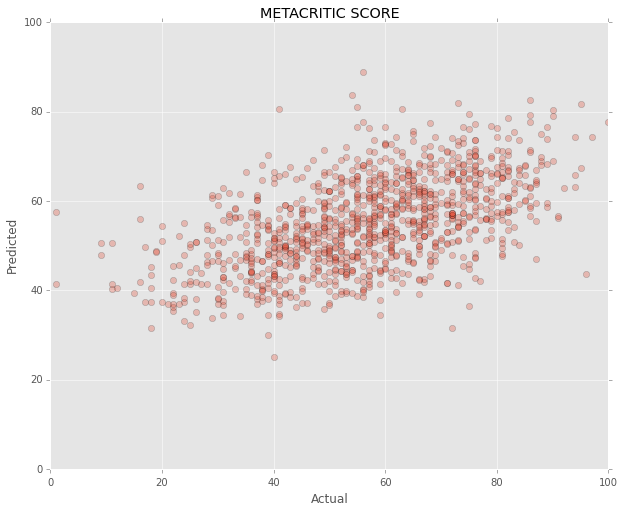

In [181]:
y_test, X_test = dmatrices(formula, data=test, return_type='dataframe')

predict4 = results4.predict(X_test)

plt.figure(figsize = (10,8))
x1,x2,y1,y2 = plt.axis()
plt.axis((0,100,0,100))

plt.plot(y_test, predict4, 'o', alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('METACRITIC SCORE')

In [187]:
model5 = ElasticNet(1.0, l1_ratio = 0.5)
results5 = model5.fit(X4, y4)

In [190]:
results5.coef_

array([ 0.        ,  0.        , -0.        , -0.68739933,  0.        ,
        0.31439458,  0.38353649,  1.49633504, -2.56492036,  0.19067156,
       -0.03422628,  0.        ,  0.        ,  0.        , -0.85110575,
       -0.        ,  2.27983303, -0.        , -0.        ,  0.        ,
       -0.26944012,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ])

In [191]:
formula

'metacritic ~ np.log(duration) + np.log(gross) + np.log(opening) + rating + month+Action + Adventure + Animation + Biography + Comedy + Crime + Drama + Family + Fantasy + History + Horror + Music + Musical + Mystery + Romance + Sci_Fi + Sport + Thriller + War + Western+X_why_not_productions + X_beijing_new_picture_film_co + X_bandai_visual_company + X_hbo_films + X_cj_entertainment + X_aliclo + X_arte_france_cinma + X_fidlit_productions + X_warner_independent_pictures_wip + X_focus_features + X_fandango + X_canal_espaa + X_sony_pictures_classics + X_xfilme_creative_pool + X_bbc_films + X_paramount_vantage + X_dreamworks_animation + X_fox_searchlight_pictures + X_canal + X_british_broadcasting_corporation_bbc+X_universal_pictures + X_warner_bros + X_paramount_pictures + X_twentieth_century_fox_film_corporation + X_new_line_cinema + X_columbia_pictures_corporation + X_touchstone_pictures + X_dreamworks_skg + X_walt_disney_pictures + X_columbia_pictures + X_metrogoldwynmayer_mgm + X_miram

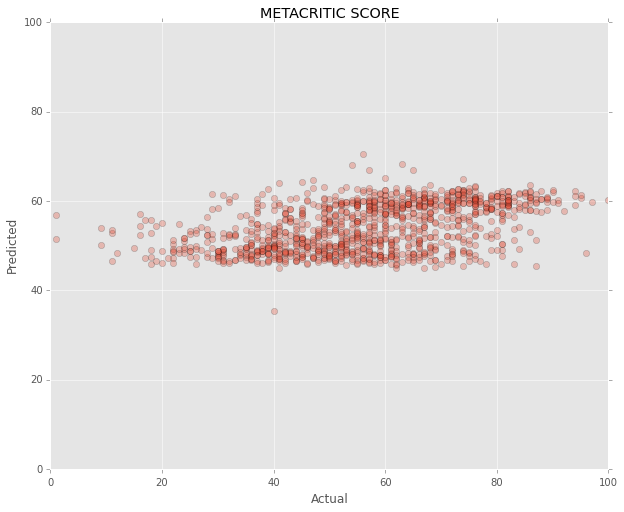

In [192]:
y_test, X_test = dmatrices(formula, data=test, return_type='dataframe')

predict5 = results5.predict(X_test)

plt.figure(figsize = (10,8))
x1,x2,y1,y2 = plt.axis()
plt.axis((0,100,0,100))

plt.plot(y_test, predict5, 'o', alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('METACRITIC SCORE')